### Importación de datos



In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Para este desafio voy a utilizar de guia y apoyarme en comentarios sobre los pasos como en un cuaderno para no olvidar las funciones principales importantes y sus desempeños

Verificar a ver si ya está todo para el challenge


In [65]:
!pip show pandas numpy scikit-learn seaborn matplotlib

Name: pandas
Version: 2.2.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: The Pandas Development Team <pandas-dev@python.org>
License: BSD 3-Clause License

Copyright (c) 2008-2011, AQR Capital Management, LLC, Lambda Foundry, Inc. and PyData Development Team
All rights reserved.

Copyright (c) 2011-2023, Open source contributors.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be u

In [66]:
# Ver las columnas disponibles
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [67]:
#verificar la estructura general
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


# En el analisis se van a realizar 3 gráficos:

* Gráfico de Barras : ingresos por tienda.

* Gráfico Circular : distribución de categorías.

* Gráfico de Dispersión : relación precio-envío.

---



#1. Análisis de facturación
Calcular la suma de la columna Precio de cada DataFrame.

> Agregar bloque entrecomillado




In [68]:
ingreso_tienda1 = tienda["Precio"].sum().round(3)
print ("Ingreso total de la Tienda 1:", ingreso_tienda1)

ingreso_tienda2 = tienda2["Precio"].sum().round(3)
print ("Ingreso total de la Tienda 2:", ingreso_tienda2)

ingreso_tienda3 = tienda3["Precio"].sum().round(3)
print ("Ingreso total de la Tienda 3:", ingreso_tienda3)

ingreso_tienda4 = tienda4["Precio"].sum().round(3)
print ("Ingreso total de la Tienda 4:", ingreso_tienda4)

Ingreso total de la Tienda 1: 1150880400.0
Ingreso total de la Tienda 2: 1116343500.0
Ingreso total de la Tienda 3: 1098019600.0
Ingreso total de la Tienda 4: 1038375700.0


In [69]:

ingresos = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
})

# Redondear a 3 decimales
ingresos["Ingreso Total"] = ingresos["Ingreso Total"].round(3)

print(ingresos)

# Ingreso total consolidado (todas las tiendas)
total_general = ingresos["Ingreso Total"].sum().round(3)
print("\nIngreso total consolidado: $", total_general)

     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09

Ingreso total consolidado: $ 4403619200.0


* Gráficos


plt.bar(x, y) genera un gráfico de barras.

x = lista con las etiquetas (Tienda 1, Tienda 2, …).

y = lista con los ingresos de cada tienda.

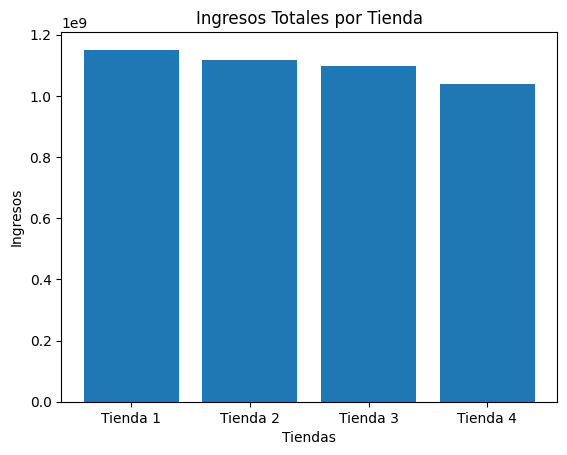

In [88]:
#Los datos son los del analisis de ingresos de las tiendas
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

#Crea un grafico de barras
plt.bar(tiendas, ingresos)

#Los titulos y etiquetas del grafico
plt.title("Ingresos Totales por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ingresos")

#Muestra el grafico
plt.show()

plt.title, plt.xlabel, plt.ylabel → agregan títulos y nombres de ejes.

# 2. Ventas por categoría
Cuántos productos se vendieron en cada **categoría** y en cada **tienda**.

Voy a trabajar con la columna **Categoría del Producto** de cada DataFrame (tienda, tienda2, etc.).

1. Agrupar los datos por categoría

In [70]:
tienda.groupby("Categoría del Producto")


2. Contar cuántos productos hay en cada grupo

* .size() → cuenta filas en cada grupo (ideal para saber cuántas ventas hubo).

* .count() → cuenta valores no nulos por columna (también sirve, pero da más de una columna).

Entonces, para este analisis uso .size()

In [71]:
ventas_categoria_t1 = tienda.groupby("Categoría del Producto").size()


Serie de pandas donde

El índice son las categorías (Electrónicos, Muebles, Juguetes, etc.).

Los valores son la cantidad de ventas en esa categoría.

In [72]:
#print(ventas_categoria_t1)

3. Ordenar los resultados


Ordenadas de mayor a menor en popularidad

In [73]:
ventas_categoria_t1 = ventas_categoria_t1.sort_values(ascending=False)


Ahora que ya standarice para una tienda, lo hago con todas uniendo las funciones

In [74]:
ventas_categoria_t2 = tienda2.groupby("Categoría del Producto").size().sort_values(ascending=False)
ventas_categoria_t3 = tienda3.groupby("Categoría del Producto").size().sort_values(ascending=False)
ventas_categoria_t4 = tienda4.groupby("Categoría del Producto").size().sort_values(ascending=False)

Para visualizarlas hago print de todas (se puede usar solo el nombre de la variable para imprimir)

In [75]:
print("Ventas por categoría - Tienda 1")
print(ventas_categoria_t1, "\n")
print("Ventas por categoría - Tienda 2")
print(ventas_categoria_t2, "\n")
print("Ventas por categoría - Tienda 3")
print(ventas_categoria_t3, "\n")
print("Ventas por categoría - Tienda 4")
print(ventas_categoria_t4, "\n")

Ventas por categoría - Tienda 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
dtype: int64 

Ventas por categoría - Tienda 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
dtype: int64 

Ventas por categoría - Tienda 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
dtype: int64 

Ventas por categoría - Tienda 4
Categoría del 

Gráfico Circular: Muestra la distribución de categorías en una tienda

**value_counts()  cuenta cuántas ventas hay en cada categoría.**

**plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')**

Los parametros son:

* valores = las cantidades vendidas.

* labels = los nombres de las categorías.

* autopct = muestra el porcentaje dentro de cada porción (ej: 23.5%).


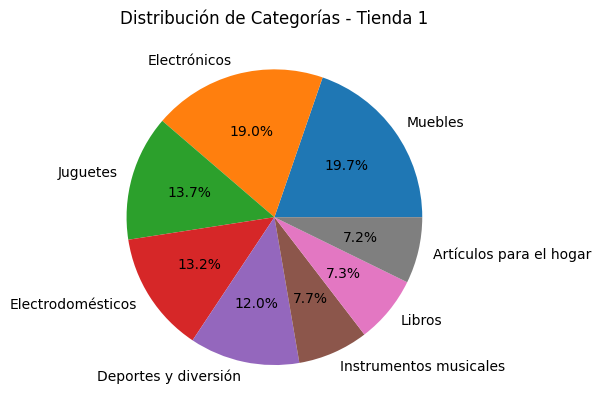

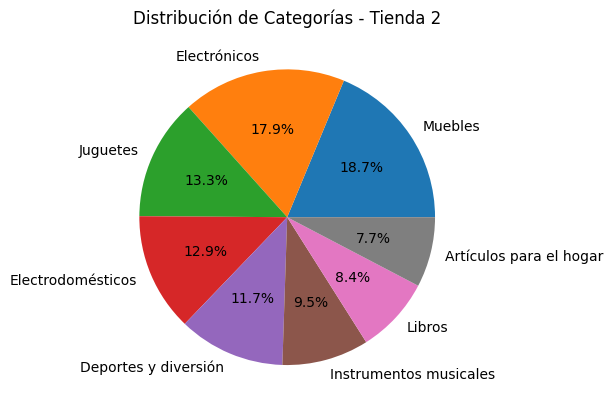

In [91]:
# Contar ventas por categoría ( Tienda 1)
ventas_categoria_t1 = tienda["Categoría del Producto"].value_counts()

# Gráfico circular
plt.pie(ventas_categoria_t1, labels=ventas_categoria_t1.index, autopct='%1.1f%%')

# Título
plt.title("Distribución de Categorías - Tienda 1")

plt.show()

# Contar ventas por categoría ( Tienda 2)
ventas_categoria_t2 = tienda2["Categoría del Producto"].value_counts()

# Gráfico circular
plt.pie(ventas_categoria_t2, labels=ventas_categoria_t2.index, autopct='%1.1f%%')

# Título
plt.title("Distribución de Categorías - Tienda 2")

plt.show()

# 3. Calificación promedio de la tienda


Conocer cómo califican los clientes su satisfacción en cada tienda.

.mean() es una funcion que calcula el promedio.

La columna va a ser **Calificación**.

In [76]:
val_media_t1 = tienda["Calificación"].mean()
val_media_t2 = tienda2["Calificación"].mean()
val_media_t3 = tienda3["Calificación"].mean()
val_media_t4 = tienda4["Calificación"].mean()


In [77]:
print("Valoración media Tienda 1:", round(val_media_t1, 2))
print("Valoración media Tienda 2:", round(val_media_t2, 2))
print("Valoración media Tienda 3:", round(val_media_t3, 2))
print("Valoración media Tienda 4:", round(val_media_t4, 2))

Valoración media Tienda 1: 3.98
Valoración media Tienda 2: 4.04
Valoración media Tienda 3: 4.05
Valoración media Tienda 4: 4.0


# 4. Productos más y menos vendidos

Que productos tuvieron más y menos ventas en cada tienda.

Uso la columna **Producto** y se cuentan cuántas veces aparece cada uno.

In [78]:
    cantidad_productos = len(tienda['Producto']),
    print("La cantidad de productos vendidos, o sea el numero de filas es : ", cantidad_productos)

La cantidad de productos vendidos, o sea el numero de filas es :  (2359,)


En el analisis voy a mostrar los 15 productos mas y menos vendidos

.value_counts() da la frecuencia de cada valor único en la columna, o sea cuantas veces aparece cada producto.

In [79]:
productos_t1 = tienda["Producto"].value_counts()

In [80]:
print("Productos más vendidos - Tienda 1:")
print(productos_t1.head(15))
print("\nProductos menos vendidos - Tienda 1:")
print(productos_t1.tail(15))

Productos más vendidos - Tienda 1:
Producto
Microondas                   60
TV LED UHD 4K                60
Armario                      60
Secadora de ropa             58
Mesa de noche                56
Bloques de construcción      56
Balón de baloncesto          55
Bicicleta                    54
Vaso térmico                 54
Refrigerador                 54
Impresora                    54
Batería                      53
Cubertería                   52
Carrito de control remoto    52
Modelado predictivo          51
Name: count, dtype: int64

Productos menos vendidos - Tienda 1:
Producto
Tablet ABXY                    42
Sillón                         41
Iniciando en programación      41
Set de vasos                   41
Asistente virtual              40
Muñeca bebé                    40
Mesa de comedor                40
Dinosaurio Rex                 40
Cuerda para saltar             40
Mochila                        39
Ciencia de datos con Python    39
Pandereta                    

In [81]:
productos_t2 = tienda2["Producto"].value_counts()
productos_t3 = tienda3["Producto"].value_counts()
productos_t4 = tienda4["Producto"].value_counts()

print("Productos más vendidos - Tienda 2:")
print(productos_t2.head(15))
print("\nProductos menos vendidos - Tienda 2:")
print(productos_t2.tail(15))


print("Productos más vendidos - Tienda 3:")
print(productos_t3.head(15))
print("\nProductos menos vendidos - Tienda 3:")
print(productos_t3.tail(15))

print("Productos más vendidos - Tienda 4:")
print(productos_t4.head(15))
print("\nProductos menos vendidos - Tienda 4:")
print(productos_t4.tail(15))


Productos más vendidos - Tienda 2:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Secadora de ropa             57
Iphone 15                    55
Bloques de construcción      54
Armario                      54
Set de ollas                 52
Cuerda para saltar           50
Lavadora de ropa             49
Silla de oficina             49
Refrigerador                 49
Muñeca bebé                  48
Name: count, dtype: int64

Productos menos vendidos - Tienda 2:
Producto
Sofá reclinable                44
Dashboards con Power BI        43
Ciencia de datos con Python    43
Balón de baloncesto            42
Estufa                         42
Dinosaurio Rex                 42
Celular ABXY                   41
Smart TV                       40
Cubertería                     39
Asistente virtual              38
Auriculares                    37
Sillón                       

# 5. Envío promedio por tienda

Calculo de cuánto gasta la tienda en promedio por envío.

La columna que se usa es **Costo de Envío**.

In [84]:
envio_prom_t1 = tienda["Costo de envío"].mean()
envio_prom_t2 = tienda2["Costo de envío"].mean()
envio_prom_t3 = tienda3["Costo de envío"].mean()
envio_prom_t4 = tienda4["Costo de envío"].mean()

In [92]:
print("Envío promedio Tienda 1:", round(envio_prom_t1, 2))
print("Envío promedio Tienda 2:", round(envio_prom_t2, 2))
print("Envío promedio Tienda 3:", round(envio_prom_t3, 2))
print("Envío promedio Tienda 4:", round(envio_prom_t4, 2))

Envío promedio Tienda 1: 26018.61
Envío promedio Tienda 2: 25216.24
Envío promedio Tienda 3: 24805.68
Envío promedio Tienda 4: 23459.46


Gráfico de Dispersión : Relación entre precio y costo de envío

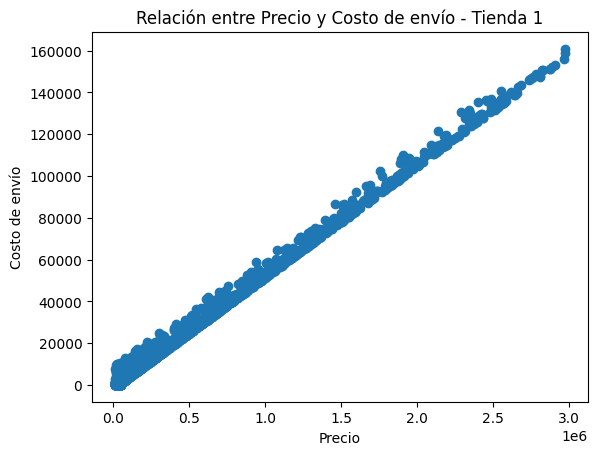

In [94]:
# Gráfico de dispersión Tienda 1
plt.scatter(tienda["Precio"], tienda["Costo de envío"])

# Títulos y etiquetas
plt.title("Relación entre Precio y Costo de envío - Tienda 1")
plt.xlabel("Precio")
plt.ylabel("Costo de envío")

plt.show()


# Informe final

El objeto de analisis del projecto eran las tiendas de Sr. Juan, el proposito del analisis se basó en los datos dados por Alura. EL proposito que se busca es elegir cual de las tiendas resulta mas conveniente vender.
Estudiando los ingresos totales por tienda, como se muestra en el analisis, la tienda 1 es la de mayor facturacion, es decir, posee un alto volumen de ventas y un mercado activo. Y en oposicion, la tienda 4 es la de menor facturacion, aproximadamente 100 millones menos que la Tienda 1.

Las tiendas tienen un desempeño similar en las categorías principales, segun los datos provistos el segundo analisis nos arroja que  las categorias mas y menos vendidas son utiles para poder encaminar las ventas en el sentido de mayor consumo.
Estudiando las valoraciones segun los datos de cada tienda, auqneu la de menor flujo de ventas fue la 4, es la mejor valoracion media tiene. La tienda 2, en contraste, tuvo la clififcacion mas baja.
Segun el analisis de gastos de envio, se muestra de nuevo un `positivo para la tienda 4 siendo esta la que mas bajo costo de envio tiene, lo cual podria ser muy atractivo para los clientes. La tienda 1 en cambio tuvo costos de envio mas altos.

Si se tuviera que elegir una tienda con menor desempeño, con base en los analisis sobre los ingresos y productos, la Tienda 4 seria la candidata ideal, aunque los costos de envio le favoreccen no compensa su menor facturacion, y su menor diversidad de productos mas vendidos indica un menor desempeño del comercio.